In [220]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import polars as pl

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
import warnings
from matplotlib.ticker import PercentFormatter

warnings.filterwarnings('ignore')
train_path = "/kaggle/input/child-mind-institute-problematic-internet-use/train.csv"
test_path = "/kaggle/input/child-mind-institute-problematic-internet-use/test.csv"
series_path = '/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=001f3379'

In [221]:
train_df = pd.read_csv(train_path)
train = pd.read_csv(train_path)
test_df = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/test.csv")
test_df.describe()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday
count,20.000000,20.000000,8.000000,13.000000,13.000000,13.000000,5.000000,11.000000,12.000000,11.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,1.00,9.000000,10.000000,10.00000,16.000000
mean,10.750000,0.400000,62.500000,19.835939,52.961538,79.200000,25.400000,70.545455,81.666667,117.545455,...,28.486750,15.457795,56.989275,25.985962,45.167825,1.04,2.372333,36.800000,52.30000,1.437500
std,3.725799,0.502625,11.275764,4.927625,6.942357,23.632181,3.130495,18.806189,9.316001,21.262002,...,5.099449,4.021153,14.490362,7.479799,11.940000,NaN,1.080099,5.533735,7.02456,1.152895
min,5.000000,0.000000,50.000000,14.035590,37.500000,46.000000,22.000000,57.000000,70.000000,95.000000,...,21.035200,8.895360,38.917700,15.410700,27.055200,1.04,1.100000,27.000000,40.00000,0.000000
25%,9.000000,0.000000,51.000000,16.861286,48.000000,60.200000,24.000000,60.500000,74.500000,102.500000,...,24.230725,13.815400,44.627250,19.801775,37.245575,1.04,1.270000,33.500000,47.75000,0.000000
50%,10.000000,0.000000,63.000000,18.292347,55.000000,81.600000,24.000000,63.000000,80.000000,116.000000,...,29.470400,16.402450,59.199050,26.337750,46.608850,1.04,2.340000,37.500000,53.50000,2.000000
75%,12.250000,1.000000,71.000000,21.079065,57.750000,85.600000,27.000000,73.000000,90.250000,119.500000,...,31.398725,17.674625,65.222050,30.421100,51.860475,1.04,3.020000,39.750000,55.75000,2.000000
max,19.000000,1.000000,80.000000,30.094649,60.000000,121.600000,30.000000,123.000000,97.000000,163.000000,...,36.057200,20.902000,79.698200,36.223200,63.126500,1.04,4.110000,46.000000,64.00000,3.000000


In [222]:
train_df.describe()
# In danh sách tên các cột
print(train_df.columns)


Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

In [223]:
FEATURE_COLS = [
    'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-Season',
    'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI', 'Physical-Height',
    'Physical-Weight', 'Physical-Waist_Circumference', 'Physical-Diastolic_BP',
    'Physical-HeartRate', 'Physical-Systolic_BP', 'Fitness_Endurance-Season',
    'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins',
    'Fitness_Endurance-Time_Sec', 'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone',
    'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone',
    'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone',
    'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone',
    'BIA-Season', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
    'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI',
    'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW',
    'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_A-Season',
    'PAQ_A-PAQ_A_Total', 'PAQ_C-Season', 'PAQ_C-PAQ_C_Total', 'SDS-Season',
    'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T', 'PreInt_EduHx-Season',
    'PreInt_EduHx-computerinternet_hoursday'
]

CATEGORY_COLS = [
    'Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season',
    'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season',
    'PAQ_C-Season', 'SDS-Season', 'PreInt_EduHx-Season'
]
CATEGORY_NUM_COLS = []

TARGET_COL = 'sii'

CHECK_COLS = ['BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
    'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI',
    'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW',
    'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW']

PHYSICAL_COL = ['Physical-BMI','Physical-Height','Physical-Weight','Physical-Waist_Circumference',
                'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP']


FEATURE_DROP = [
                             
]
PCIAT = [
    'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 
    'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 
    'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 
    'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 
    'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'PCIAT-PCIAT_Total'
]



CGAS = ['CGAS-Season', 'CGAS-CGAS_Score']

BIA =  ['BIA-BIA_BMC', 'BIA-BIA_BMI', 
        'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 
        'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 
        'BIA-BIA_ICW', 'BIA-BIA_LDM', 
        'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW']
BIA_cat = [ 'BIA-BIA_Frame_num', 'BIA-BIA_Activity_Level_num']

FGC =  ['FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 
       'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone',
       'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone']

FE = ['Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec']



Internet =  ['PreInt_EduHx-Season', 'PreInt_EduHx-computerinternet_hoursday']



PAQ_A = ['PAQ_A-Season', 'PAQ_A-PAQ_A_Total']

PAQ_C= ['PAQ_C-Season', 'PAQ_C-PAQ_C_Total']

SDS = ['SDS-SDS_Total_Raw', 'SDS-SDS_Total_T']


FEATURE_USE = [feature for feature in FEATURE_COLS if feature not in FEATURE_DROP]

CATEGORY_USE = [feature for feature in CATEGORY_COLS if feature not in FEATURE_DROP]

feature_count = len(FEATURE_COLS)
category_count = len(CATEGORY_COLS)
feature_count, category_count
train_data = train_df.dropna(subset=[TARGET_COL]).copy()
test_data = test_df.copy()
train_data.describe()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,2736.000000,2736.000000,2342.000000,2527.000000,2530.000000,2572.000000,483.000000,2478.000000,2486.000000,2478.000000,...,2728.000000,2725.000000,2728.000000,2730.000000,2733.000000,2736.000000,2527.000000,2525.000000,2654.000000,2736.000000
mean,10.238670,0.364401,65.159266,19.125667,55.897051,87.839592,26.625259,69.755044,81.823411,117.127926,...,1.452346,1.627890,1.613636,1.158974,0.943652,27.896199,40.977839,57.647525,1.015072,0.580409
std,3.427982,0.481350,11.811050,4.909305,7.394938,43.353079,5.230213,13.790203,13.769816,17.221707,...,1.495600,1.445622,1.529178,1.343661,1.185460,20.338853,10.231384,13.042815,1.080861,0.771122
min,5.000000,0.000000,25.000000,0.000000,36.000000,0.000000,19.000000,11.000000,27.000000,49.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,38.000000,0.000000,0.000000
25%,8.000000,0.000000,59.000000,15.773447,50.050000,57.200000,23.000000,61.000000,73.000000,107.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,33.000000,47.000000,0.000000,0.000000
50%,10.000000,0.000000,65.000000,17.819010,55.000000,75.800000,26.000000,68.000000,81.000000,114.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000,39.000000,55.000000,1.000000,0.000000
75%,12.000000,1.000000,75.000000,21.172311,61.750000,111.450000,29.000000,76.000000,91.000000,125.000000,...,2.000000,3.000000,2.000000,2.000000,1.000000,41.000000,46.000000,64.000000,2.000000,1.000000
max,22.000000,1.000000,95.000000,46.102914,78.500000,315.000000,50.000000,179.000000,138.000000,203.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,93.000000,96.000000,100.000000,3.000000,3.000000


In [224]:
# Giả sử bạn đã có DataFrame train_data
missing_percent = train_data[FEATURE_COLS] .isnull().mean() * 100

# Chuyển thành DataFrame và sắp xếp theo tỷ lệ missing từ lớn đến bé
missing_percent_df = missing_percent.to_frame(name='Missing Percentage').sort_values(by='Missing Percentage', ascending=False)
pd.set_option('display.max_rows', None)
# In ra toàn bộ kết quả đã sắp xếp
print(missing_percent_df)

                                        Missing Percentage
PAQ_A-PAQ_A_Total                                86.732456
PAQ_A-Season                                     86.732456
Physical-Waist_Circumference                     82.346491
Fitness_Endurance-Time_Sec                       73.391813
Fitness_Endurance-Time_Mins                      73.391813
Fitness_Endurance-Max_Stage                      73.282164
FGC-FGC_GSD_Zone                                 68.421053
FGC-FGC_GSND_Zone                                68.421053
FGC-FGC_GSD                                      68.165205
FGC-FGC_GSND                                     68.128655
Fitness_Endurance-Season                         53.947368
PAQ_C-PAQ_C_Total                                47.368421
PAQ_C-Season                                     47.368421
BIA-BIA_Fat                                      33.735380
BIA-BIA_SMM                                      33.735380
BIA-BIA_BMC                                      33.7353

Missing values over the dataset

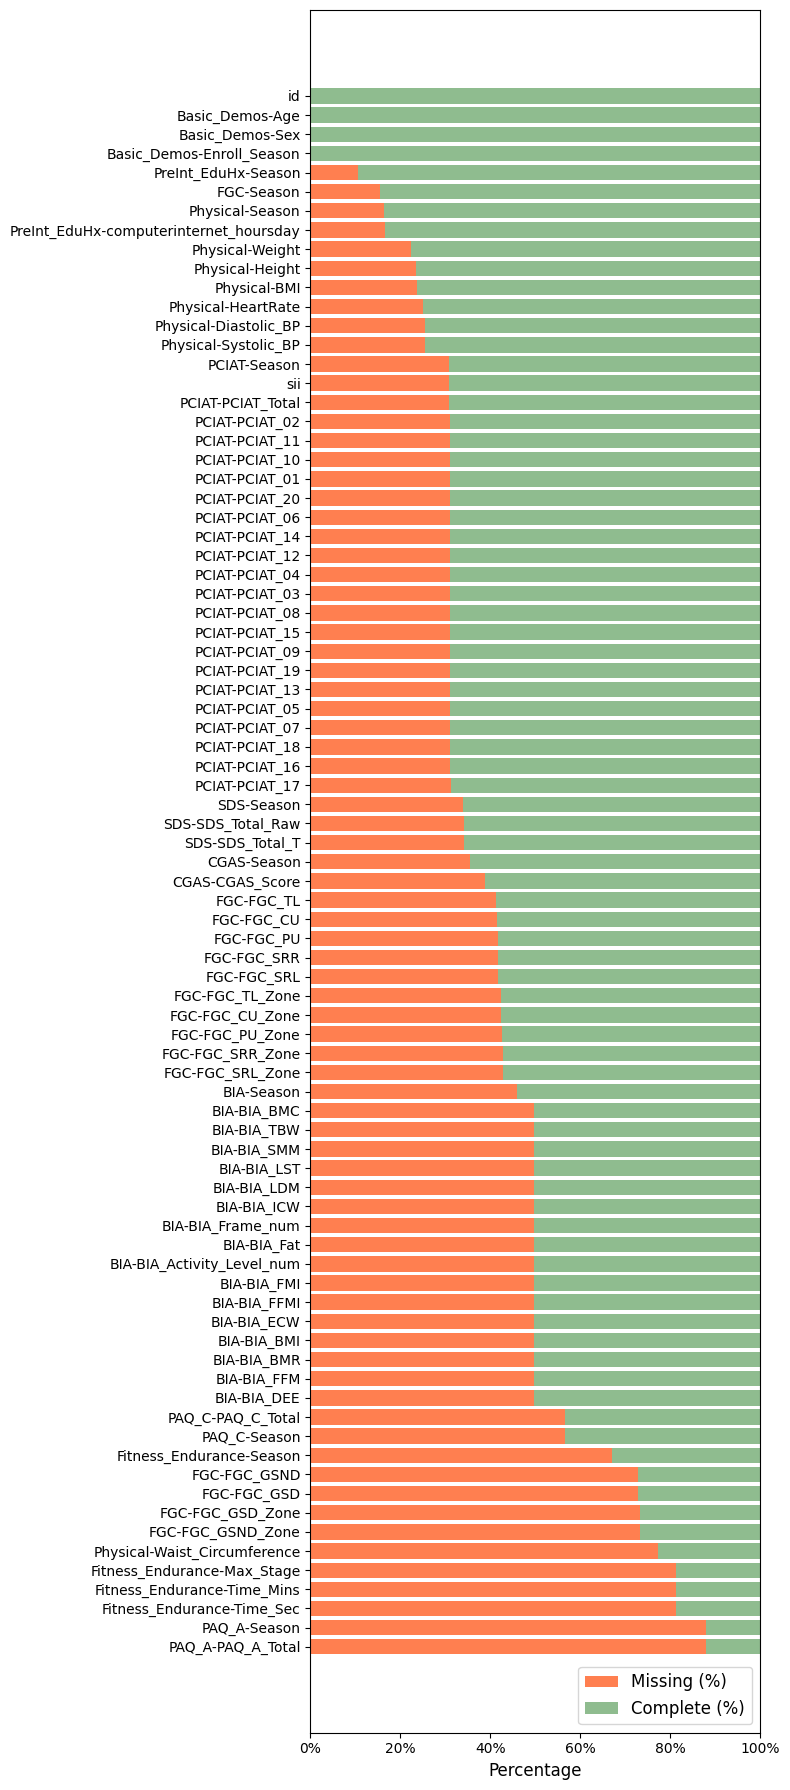

In [225]:
def plot_missing_data(df):
    missing_count = (
        df.isnull().sum()
        .sort_values(ascending=False)
        .to_frame(name='null_count')
        .reset_index()
        .rename(columns={'index': 'feature'})
    )
    missing_count['null_ratio'] = missing_count['null_count'] / len(df)

   
    plt.figure(figsize=(8, 18))  
  

    plt.barh(
        np.arange(len(missing_count)), 
        missing_count['null_ratio'], 
        color='coral', 
        label='Missing (%)'
    )

 
    plt.barh(
        np.arange(len(missing_count)), 
        1 - missing_count['null_ratio'], 
        left=missing_count['null_ratio'], 
        color='darkseagreen', 
        label='Complete (%)'
    )

 
    plt.yticks(np.arange(len(missing_count)), missing_count['feature'], fontsize=10)

 
    plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
    plt.xlim(0, 1)  
    
   
    plt.legend(loc='lower right', fontsize=12)
    plt.xlabel('Percentage', fontsize=12)
    plt.tight_layout()

    plt.show()

plot_missing_data(train_df)


Missing values after removing missing sii from the dataset


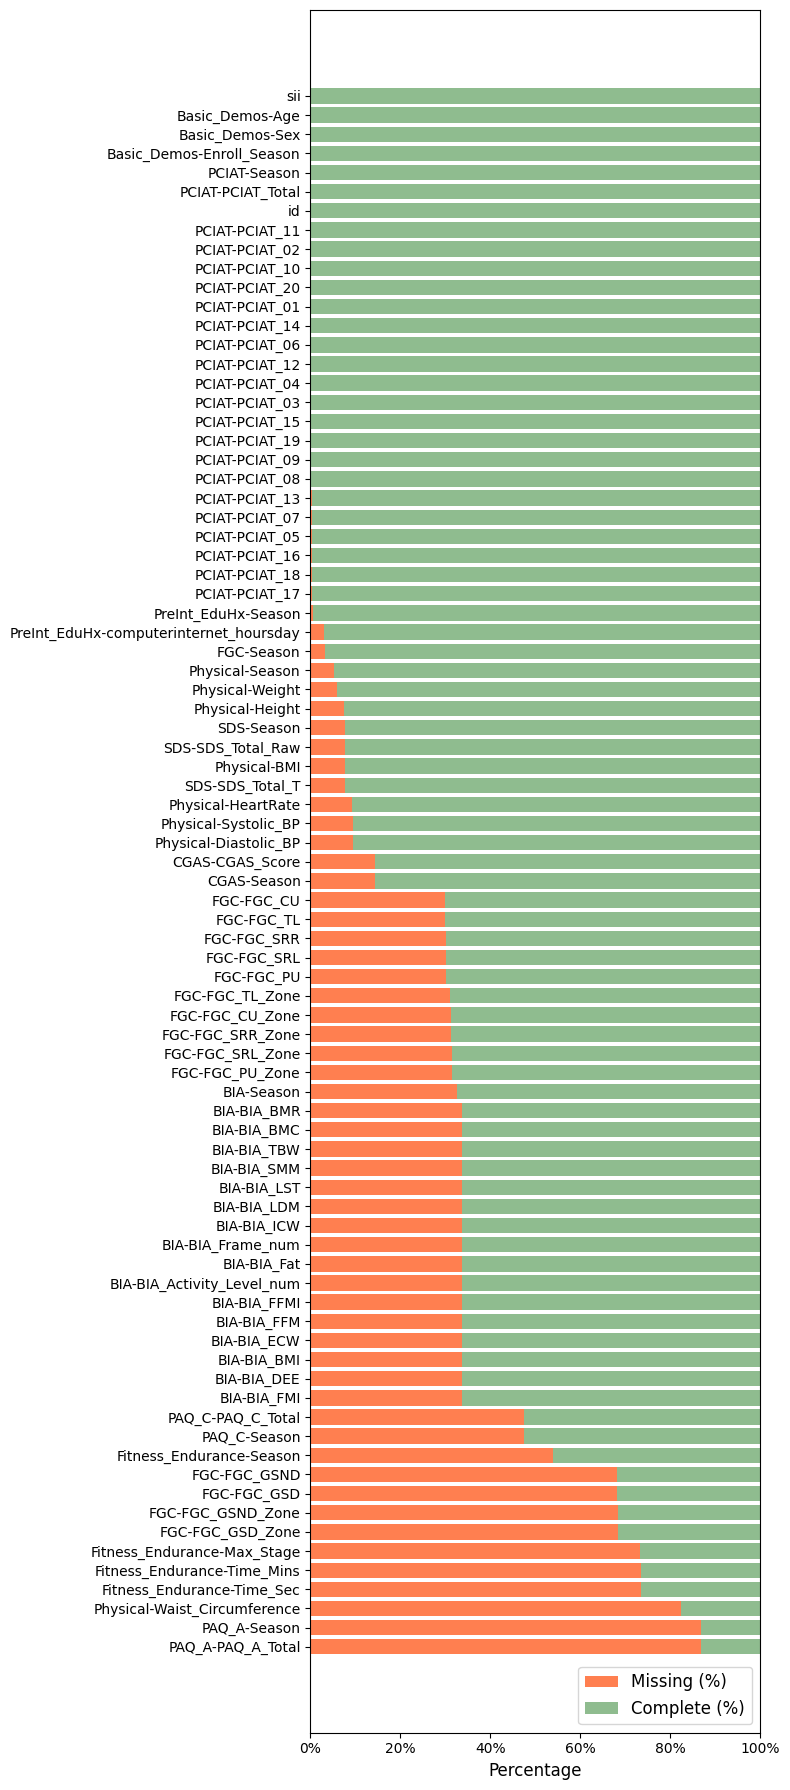

In [226]:
plot_missing_data(train_data)

Seasonal data distribution

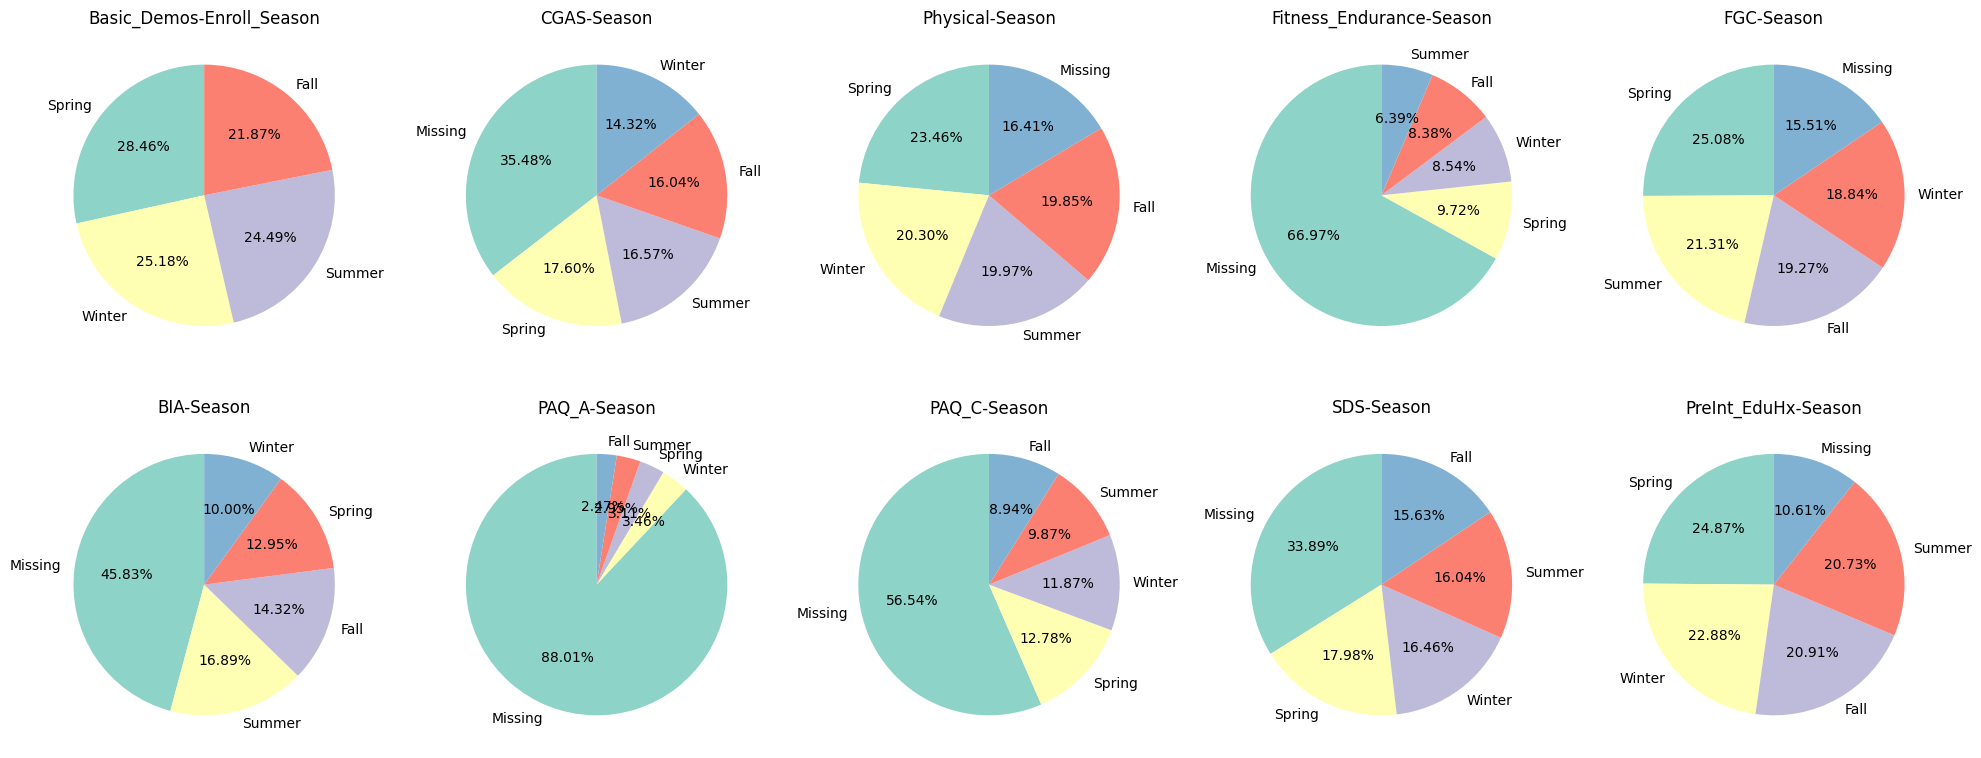

In [227]:
n_rows = 2
n_cols = 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))  


axes = axes.ravel()


for i, col in enumerate(CATEGORY_COLS):
    ax = axes[i]
    
  
    season_counts = train[col].fillna('Missing').value_counts(normalize=True)
    
    ax.pie(
        season_counts, 
        labels=season_counts.index, 
        autopct='%1.2f%%',  
        startangle=90, 
        colors=sns.color_palette("Set3"),
    
    )

    ax.set_title(f"{col}")   
plt.tight_layout()  

plt.show()


Distribution of the target variable sii

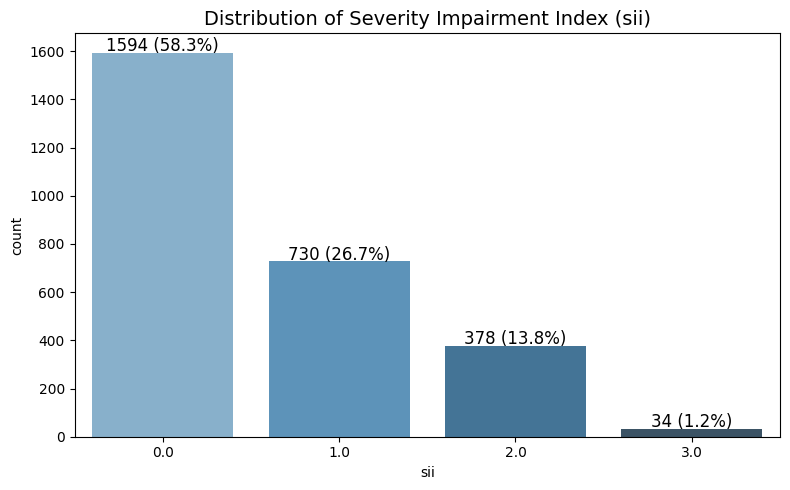

In [228]:
sii_counts = train_df['sii'].value_counts().reset_index()
sii_counts.columns = ['sii', 'count']
total = sii_counts['count'].sum()
sii_counts['percentage'] = (sii_counts['count'] / total) * 100


plt.figure(figsize=(8, 5))
sns.barplot(x='sii', y='count', data=sii_counts, palette='Blues_d')
plt.title('Distribution of Severity Impairment Index (sii)', fontsize=14)


for p in plt.gca().patches:
    height = p.get_height()
    percentage = sii_counts.loc[sii_counts['count'] == height, 'percentage'].values[0]
    plt.text(
        p.get_x() + p.get_width() / 2,
        height + 5, f'{int(height)} ({percentage:.1f}%)',
        ha="center", fontsize=12
    )

plt.tight_layout()
plt.show()


Distribution of the target variable sii by Sex group

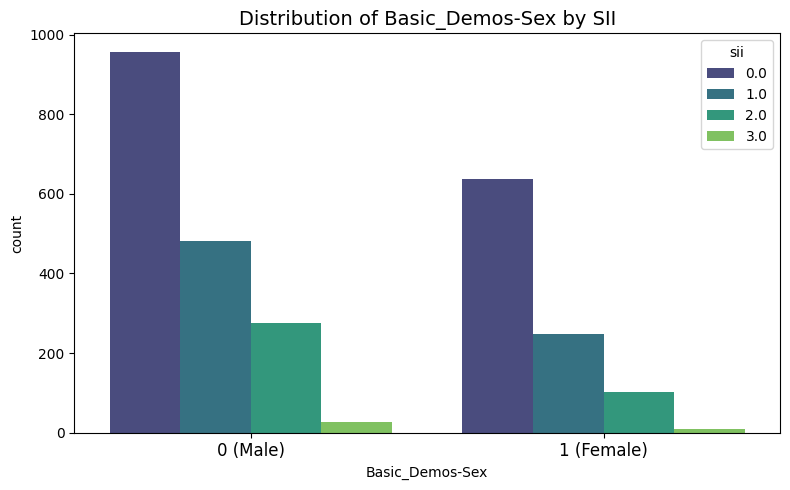

In [229]:
plt.figure(figsize=(8, 5))
sex_data = train_data.groupby(['Basic_Demos-Sex', 'sii']).size().reset_index(name='count')
sns.barplot(data=sex_data, x='Basic_Demos-Sex', y='count', hue='sii', palette='viridis')
plt.title('Distribution of Basic_Demos-Sex by SII', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['0 (Male)', '1 (Female)'], fontsize=12)
plt.tight_layout()
plt.show()


Distribution of the target variable sii by Age group

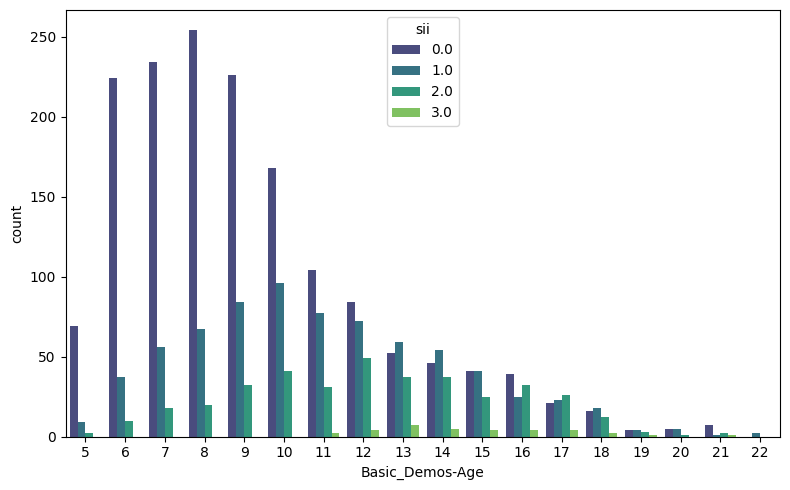

In [230]:
plt.figure(figsize=(8, 5))

age_data = train_data.groupby(['Basic_Demos-Age', 'sii']).size().reset_index(name='count')

sns.barplot(data=age_data, x='Basic_Demos-Age', y='count', hue='sii', palette='viridis')

plt.tight_layout()
plt.show()


Distribution of CGAS Score by sii

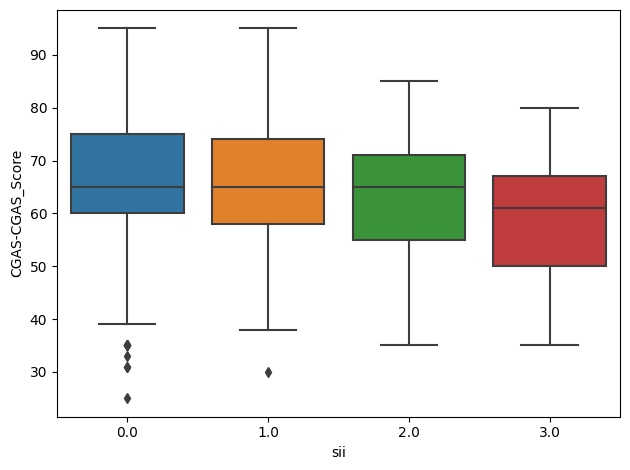

In [231]:
sns.boxplot(x='sii', y='CGAS-CGAS_Score', data=train_data)
plt.tight_layout()
plt.show()

Correlation between Height and Weight

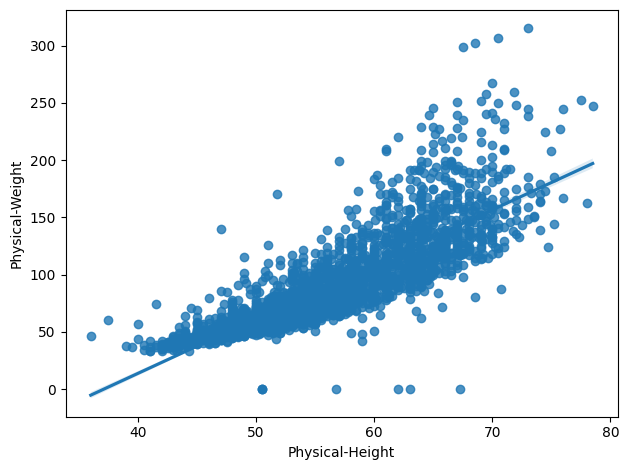

In [232]:
sns.regplot(x=train_data['Physical-Height'], y=train_data['Physical-Weight'])
plt.tight_layout()
plt.show()

Weight distribution by Age group

Text(0, 0.5, 'Weight (kg)')

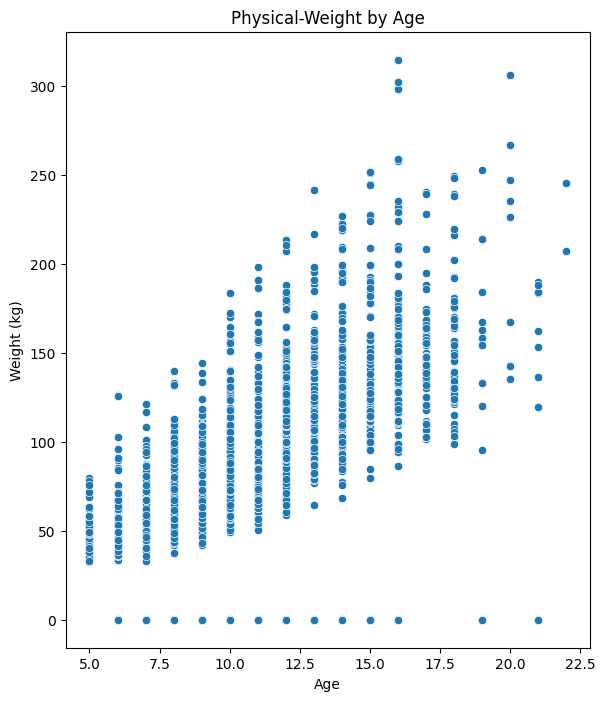

In [233]:

plt.figure(figsize=(23, 8))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Basic_Demos-Age', y='Physical-Weight', data=train_data)
plt.title('Physical-Weight by Age')
plt.xlabel('Age')
plt.ylabel('Weight (kg)')

Height distribution by Age group

Text(0, 0.5, 'Height (cm)')

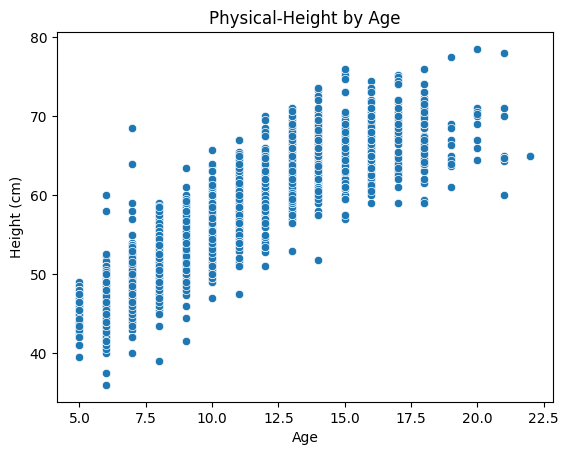

In [234]:
sns.scatterplot(x='Basic_Demos-Age', y='Physical-Height', data=train_data)
plt.title('Physical-Height by Age')
plt.xlabel('Age')
plt.ylabel('Height (cm)')

Correlation between systolic blood pressure and diastolic pressure - Red data points indicate unusual values

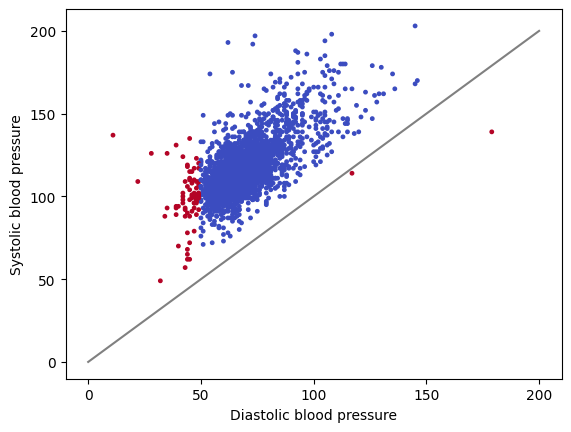

In [235]:

bp_hr_cols = ['Physical-Systolic_BP', 'Physical-Diastolic_BP']  

condition = (train_data['Physical-Systolic_BP'] <= train_data['Physical-Diastolic_BP']) | (train_data[bp_hr_cols] < 50).any(axis=1)


plt.scatter(train_data['Physical-Diastolic_BP'],
            train_data['Physical-Systolic_BP'],
            s=6,
            c=condition,  
            cmap='coolwarm')  

plt.plot([0, 200], [0, 200], color='gray')
plt.xlabel('Diastolic blood pressure')
plt.ylabel('Systolic blood pressure')
plt.xticks(np.linspace(0, 200, 5))
plt.yticks(np.linspace(0, 200, 5))

plt.show()



Distribution of Max Stage across Ages from 5 to 12

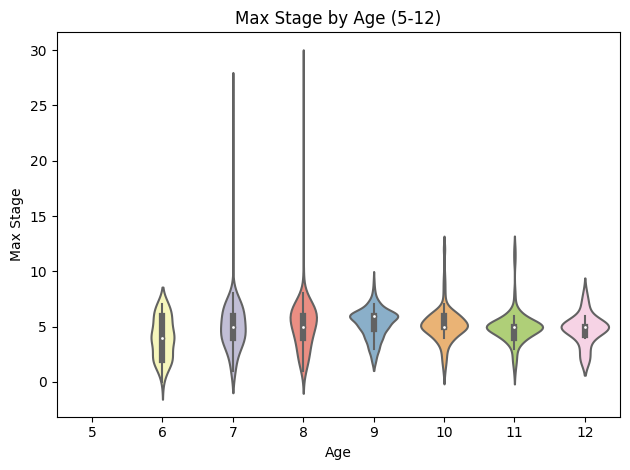

In [236]:
train_filtered = train_data[(train_data['Basic_Demos-Age'] >= 5) & (train_data['Basic_Demos-Age'] <= 12)]

sns.violinplot(
    x='Basic_Demos-Age',
    y='Fitness_Endurance-Max_Stage',
    data=train_filtered,  
    palette="Set3",
)

plt.title('Max Stage by Age (5-12)')
plt.xlabel('Age')
plt.ylabel('Max Stage')

plt.tight_layout()
plt.show()
plt.show()

Distribution of FitnessGram Child by Zone

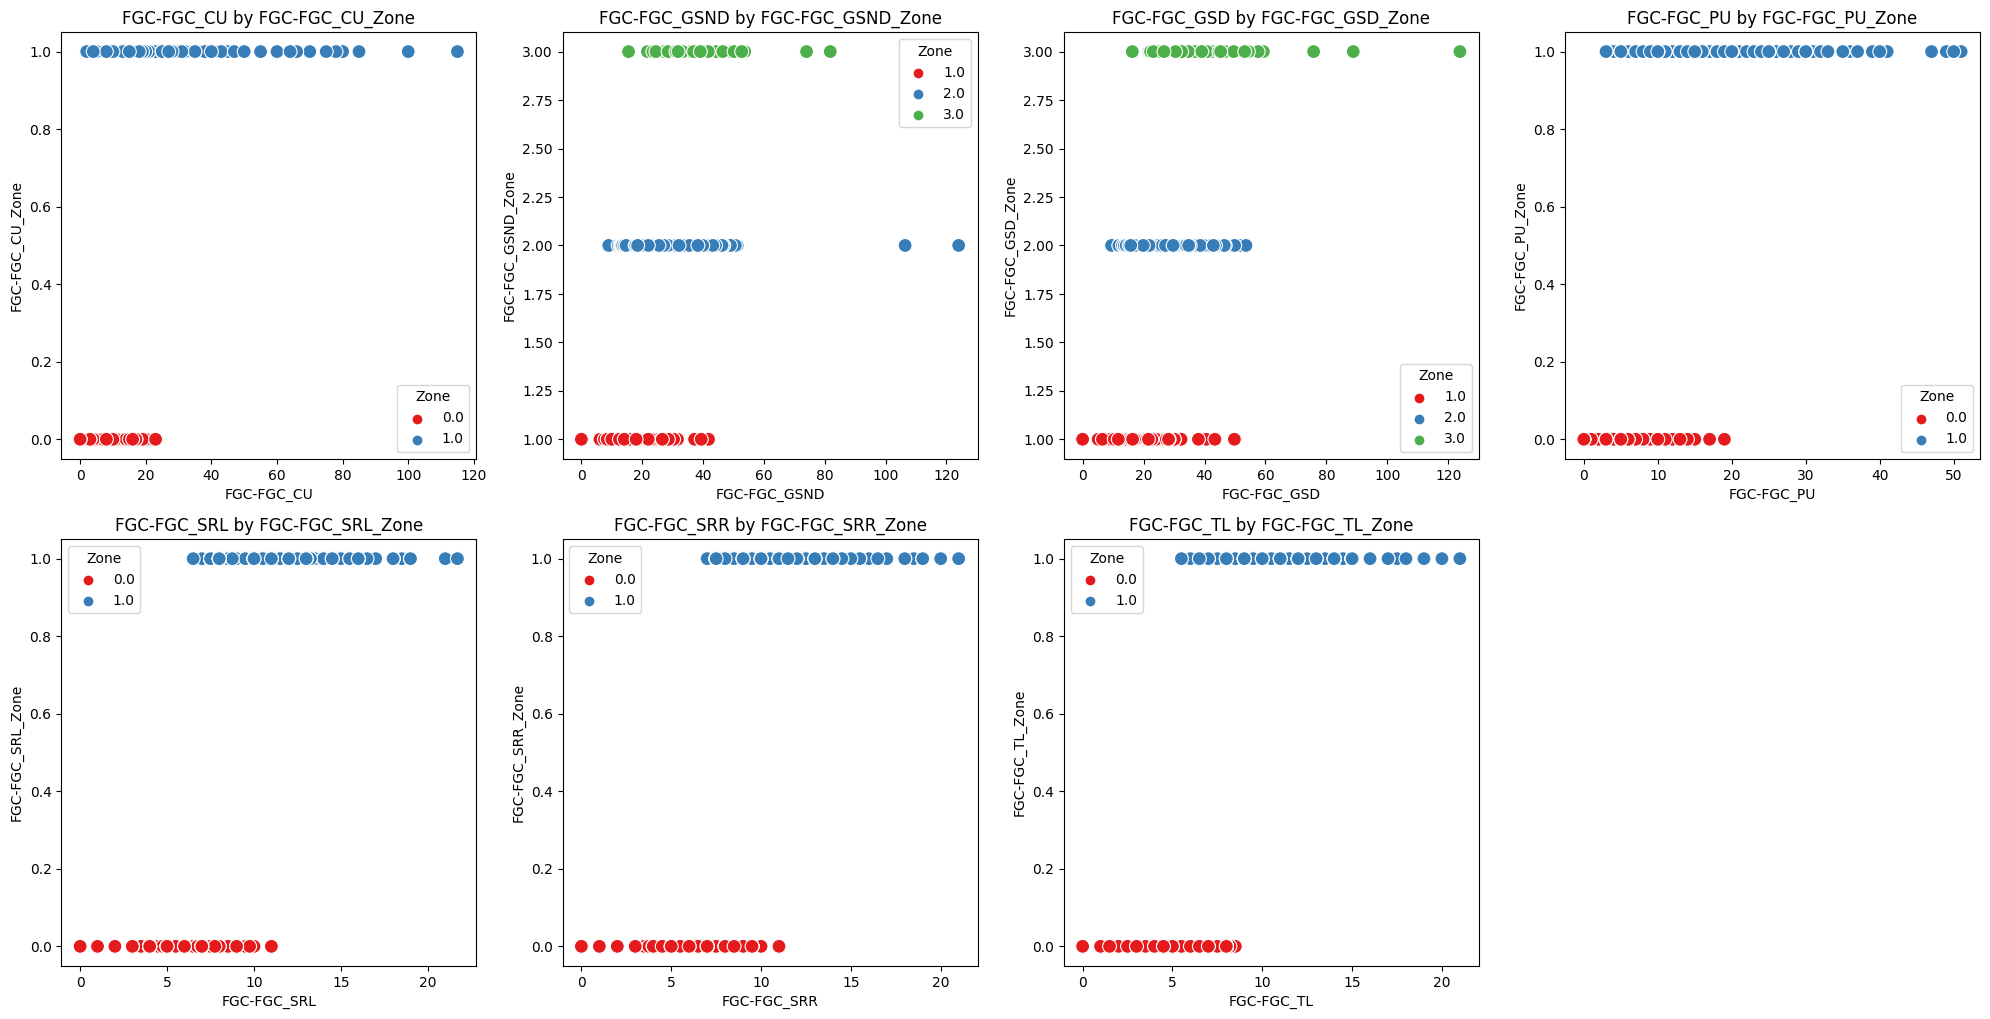

In [237]:

FGC = ['FGC-FGC_CU', 'FGC-FGC_GSND', 'FGC-FGC_GSD', 'FGC-FGC_PU', 'FGC-FGC_SRL', 
       'FGC-FGC_SRR', 'FGC-FGC_TL']
FGC_Zone = ['FGC-FGC_CU_Zone', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD_Zone',
            'FGC-FGC_PU_Zone', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR_Zone',
            'FGC-FGC_TL_Zone']

plt.figure(figsize=(20, 20))

for i, (fgc_col, zone_col) in enumerate(zip(FGC, FGC_Zone)):
    plt.subplot(4, 4, i + 1)
    sns.scatterplot(x=fgc_col, y=zone_col, data=train_data, hue=zone_col, palette="Set1", s=100)
    plt.title(f'{fgc_col} by {zone_col}')
    plt.xlabel(f'{fgc_col}')
    plt.ylabel(f'{zone_col}')
    plt.legend(title='Zone')

plt.tight_layout()
plt.show()

Distribution of FitnessGram Child by Sex

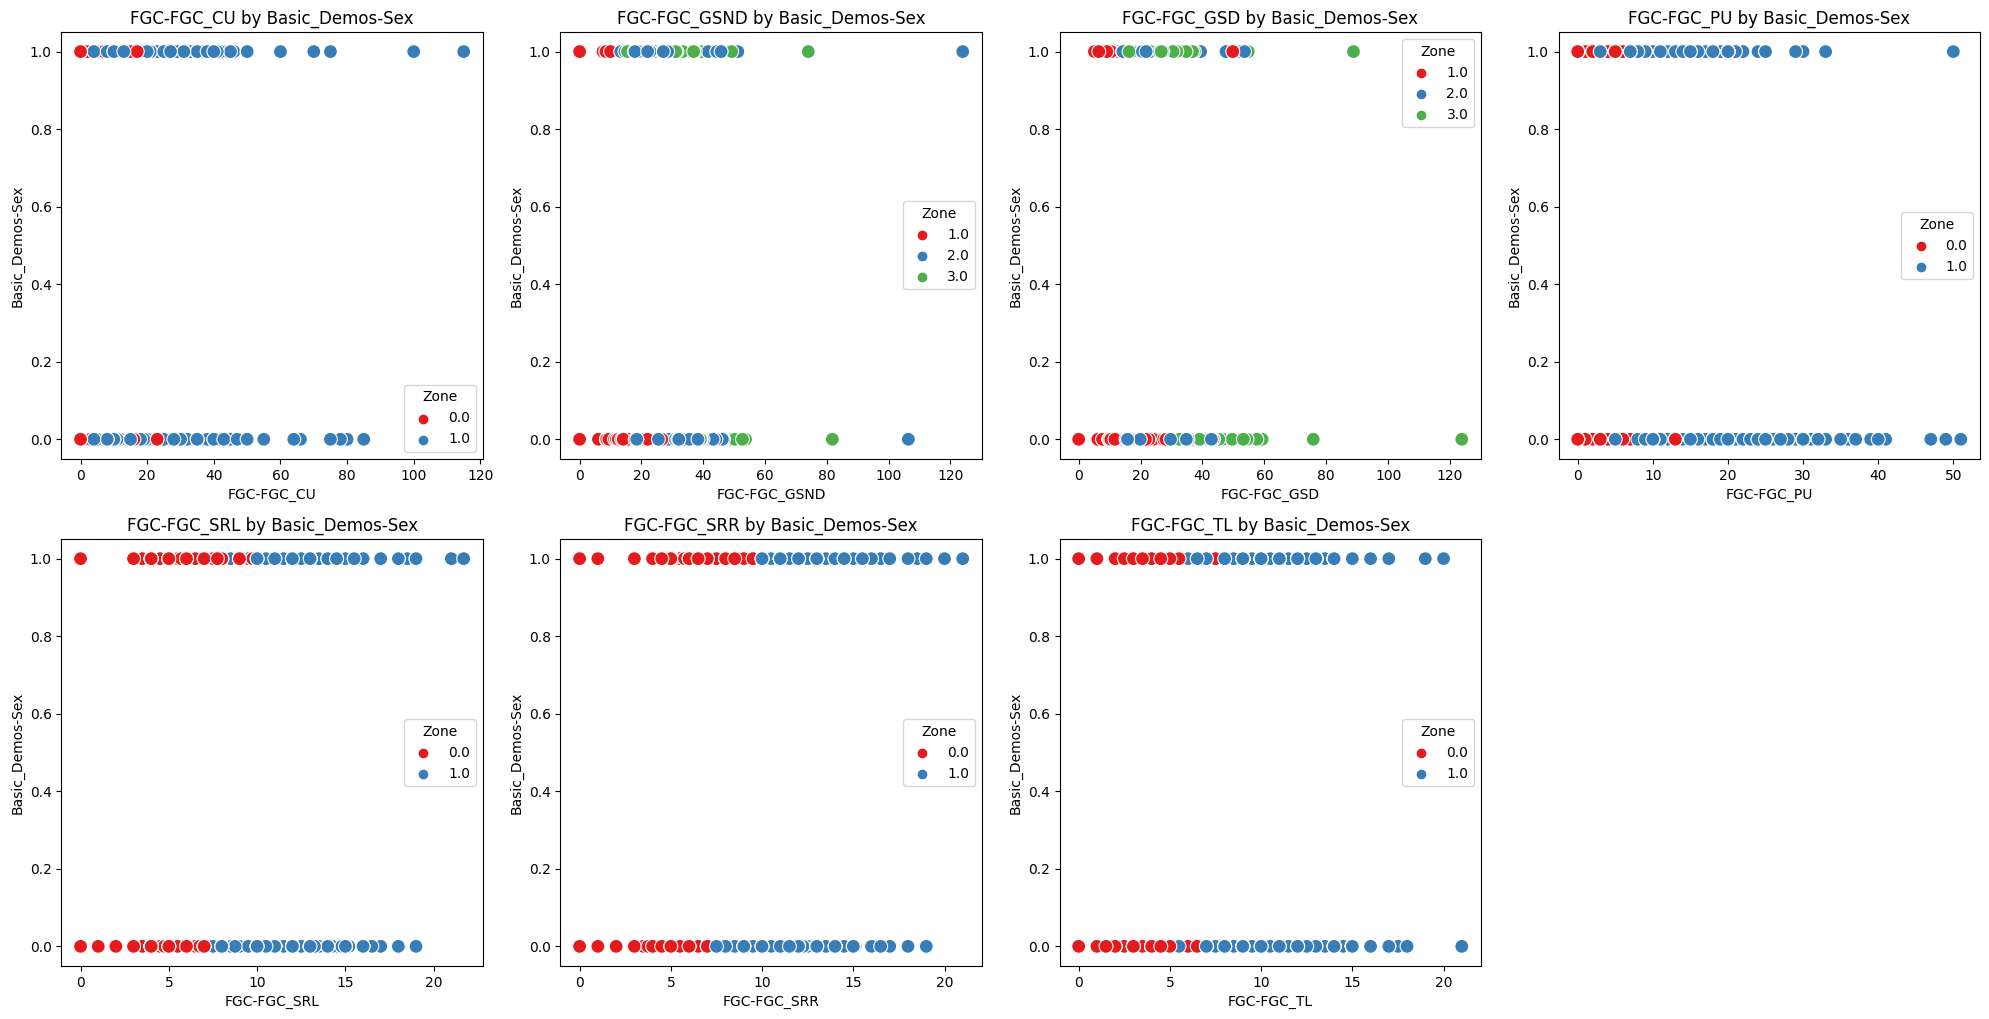

In [238]:
plt.figure(figsize=(20, 20))
for i, (fgc_col, zone_col) in enumerate(zip(FGC, FGC_Zone)):
    plt.subplot(4, 4, i + 1)
    sns.scatterplot(x=fgc_col, y='Basic_Demos-Sex', data=train_data, hue=zone_col, palette="Set1", s=100)
    plt.title(f'{fgc_col} by Basic_Demos-Sex')
    plt.xlabel(f'{fgc_col}')
    plt.ylabel('Basic_Demos-Sex')
    plt.legend(title='Zone')

plt.tight_layout()
plt.show()


Distribution of FitnessGram Child by Age

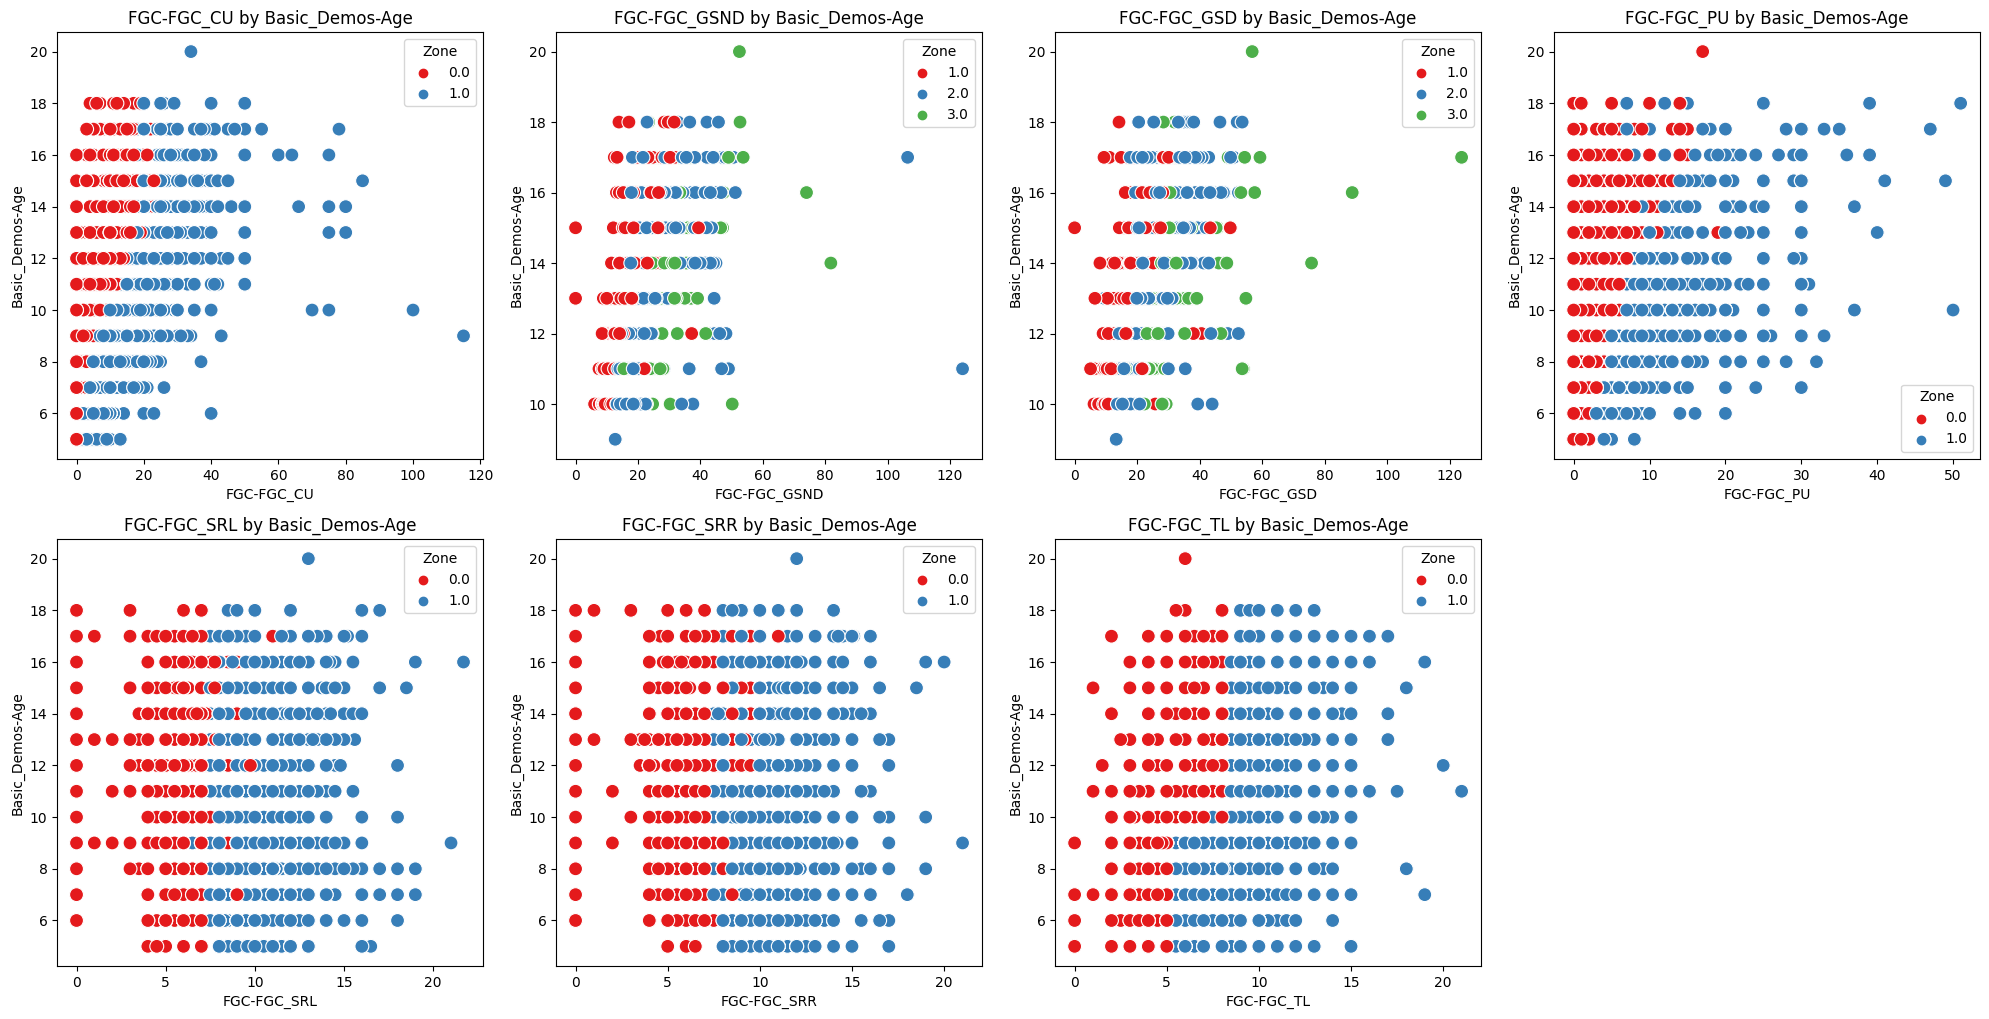

In [239]:
plt.figure(figsize=(20, 20))
for i, (fgc_col, zone_col) in enumerate(zip(FGC, FGC_Zone)):
    plt.subplot(4, 4, i + 1)
    sns.scatterplot(x=fgc_col, y='Basic_Demos-Age', data=train_data, hue=zone_col, palette="Set1", s=100)
    plt.title(f'{fgc_col} by Basic_Demos-Age')
    plt.xlabel(f'{fgc_col}')
    plt.ylabel('Basic_Demos-Age')
    plt.legend(title='Zone')

plt.tight_layout()
plt.show()

Distribution of FitnessGram Child by Age of Male Group

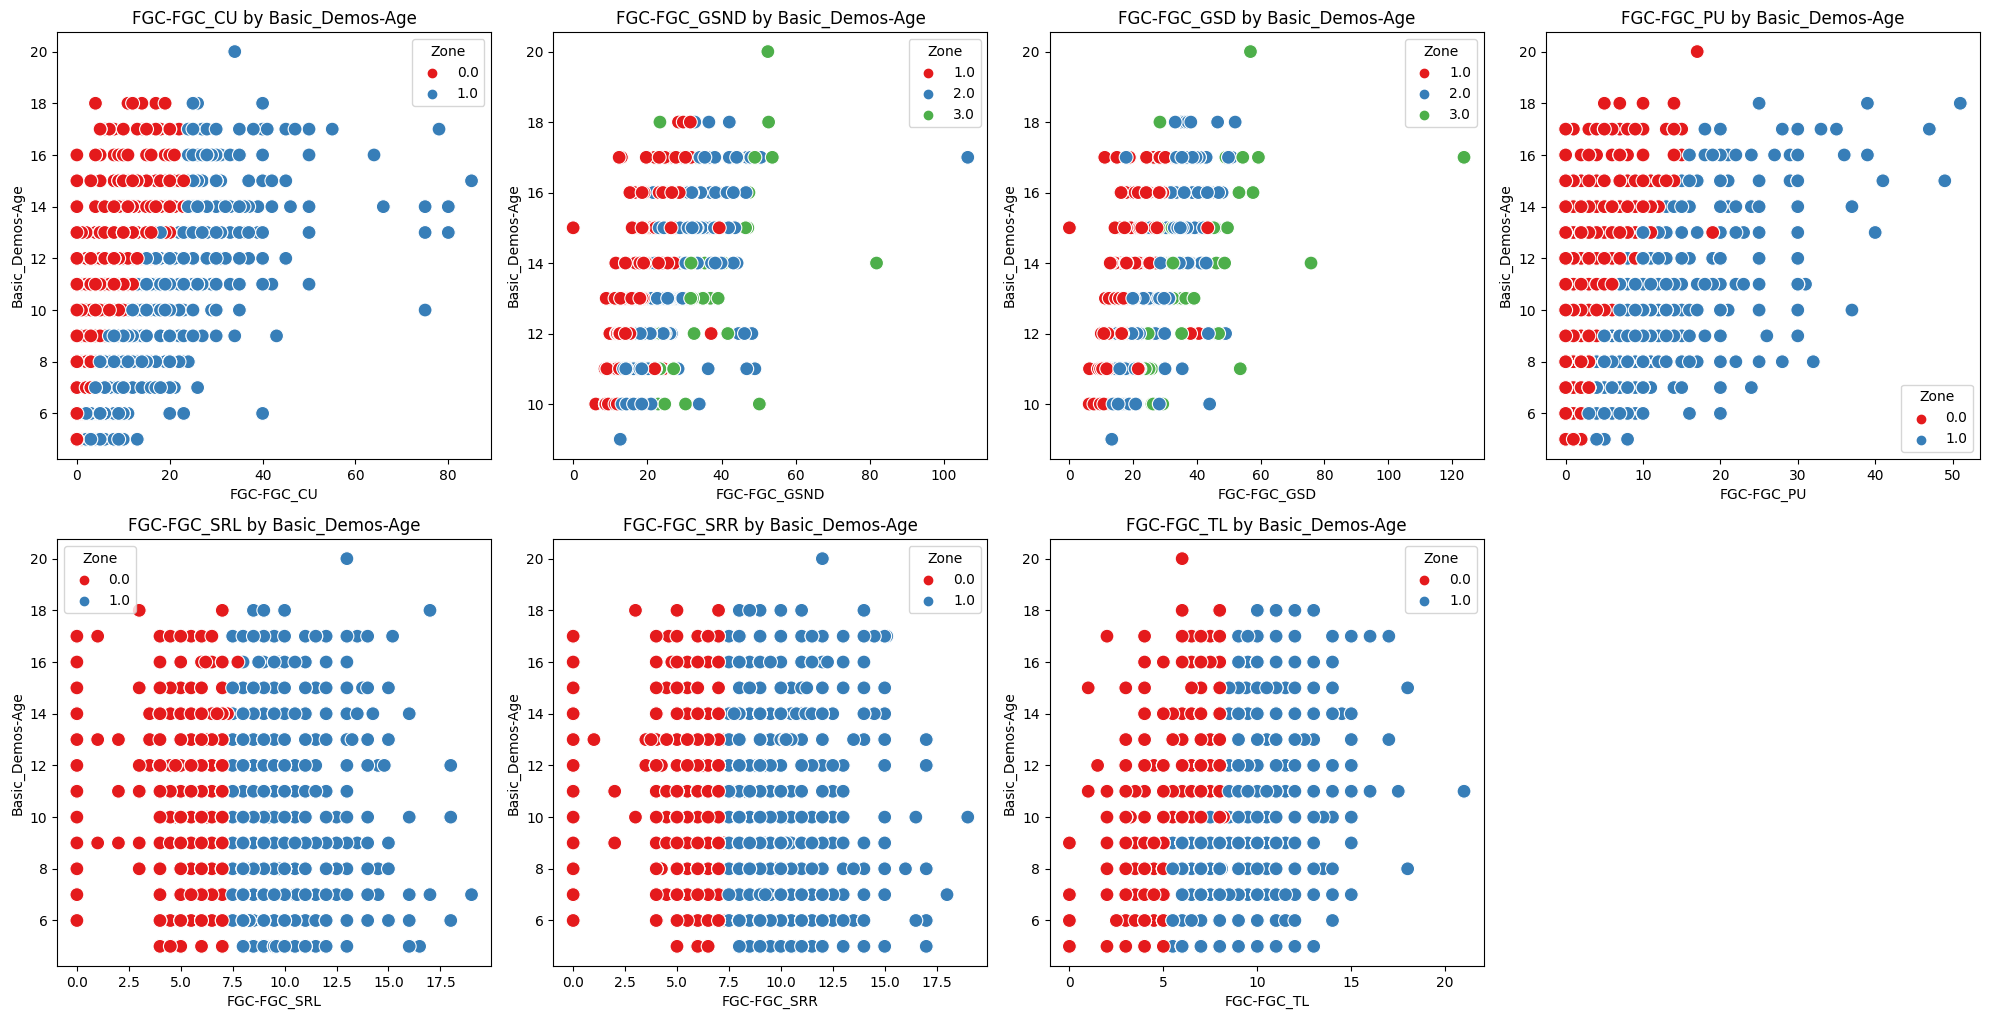

In [240]:
filtered_data = train_data[train_data['Basic_Demos-Sex'] == 0]

plt.figure(figsize=(20, 20))

for i, (fgc_col, zone_col) in enumerate(zip(FGC, FGC_Zone)):
    plt.subplot(4, 4, i + 1)
    sns.scatterplot(x=fgc_col, y='Basic_Demos-Age', data=filtered_data, hue=zone_col, palette="Set1", s=100)
    plt.title(f'{fgc_col} by Basic_Demos-Age')
    plt.xlabel(f'{fgc_col}')
    plt.ylabel('Basic_Demos-Age')
    plt.legend(title='Zone')

plt.tight_layout()
plt.show()

Distribution of FitnessGram Child by Age of Female Group

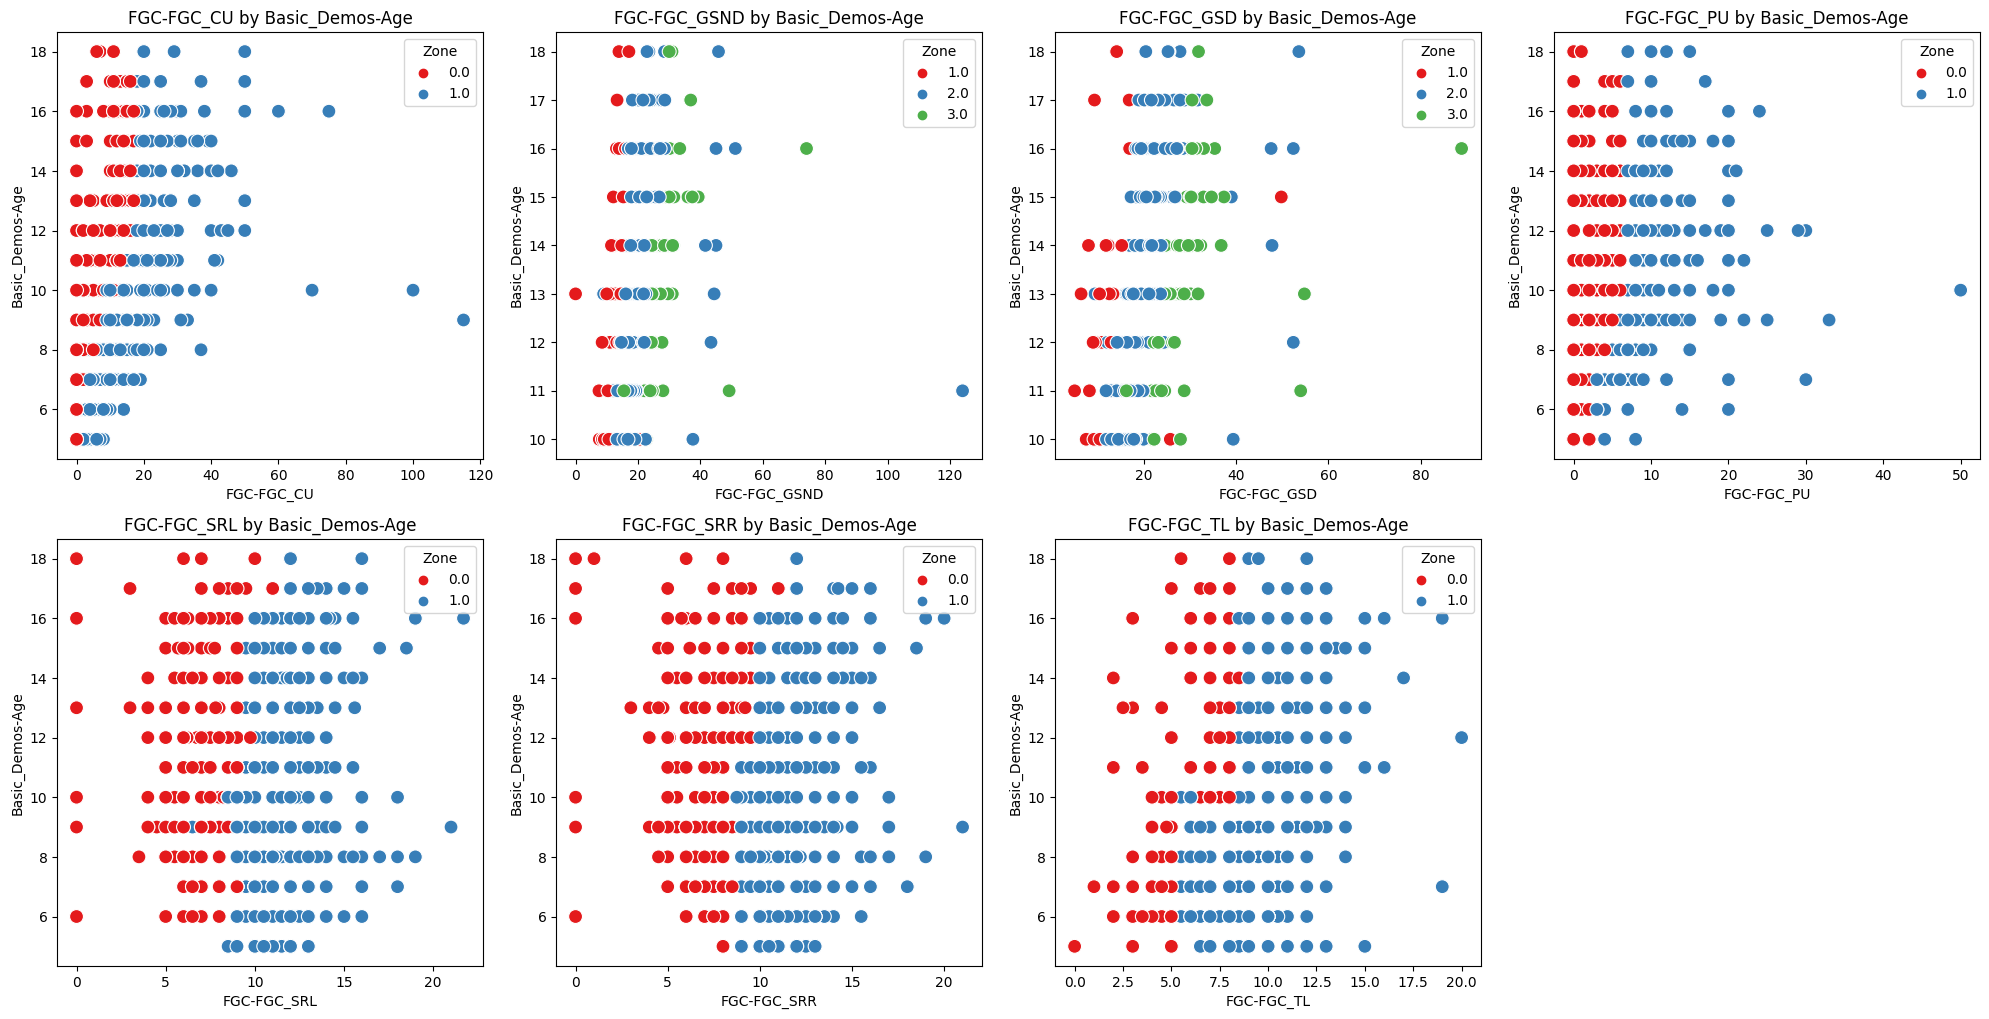

In [241]:

filtered_data = train_data[train_data['Basic_Demos-Sex'] == 1]
# Create subplots for each pair of FGC and FGC_Zone
plt.figure(figsize=(20, 20))

for i, (fgc_col, zone_col) in enumerate(zip(FGC, FGC_Zone)):
    plt.subplot(4, 4, i + 1)
    sns.scatterplot(x=fgc_col, y='Basic_Demos-Age', data=filtered_data, hue=zone_col, palette="Set1", s=100)
    plt.title(f'{fgc_col} by Basic_Demos-Age')
    plt.xlabel(f'{fgc_col}')
    plt.ylabel('Basic_Demos-Age')
    plt.legend(title='Zone')

plt.tight_layout()
plt.show()

Distribution of BIA Groups by sii

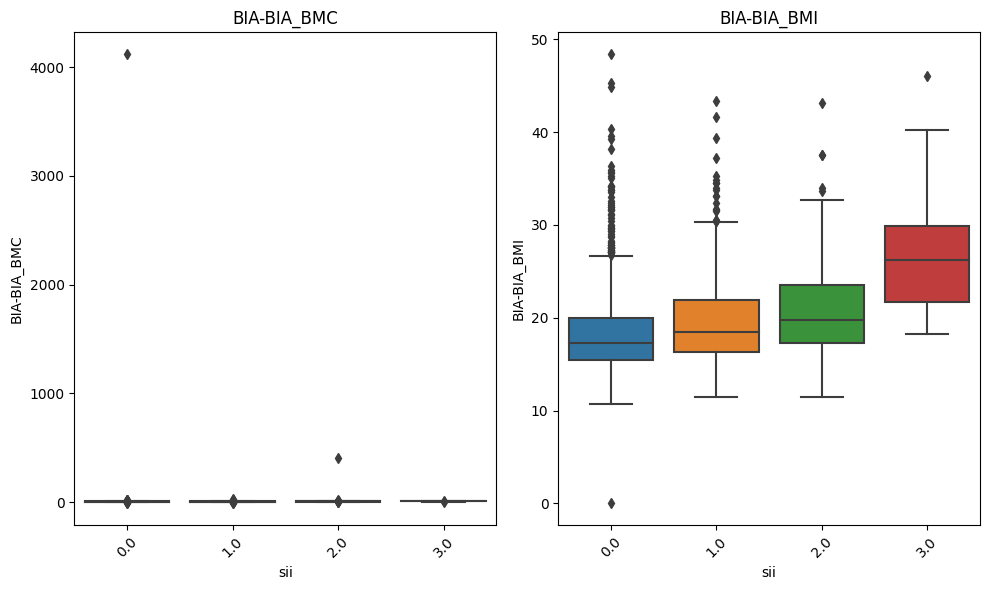

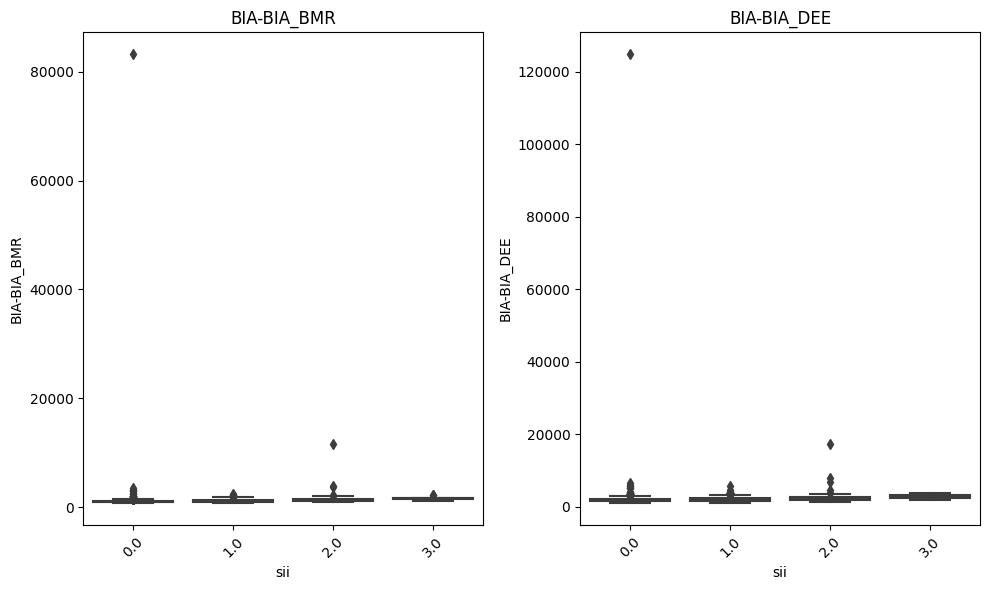

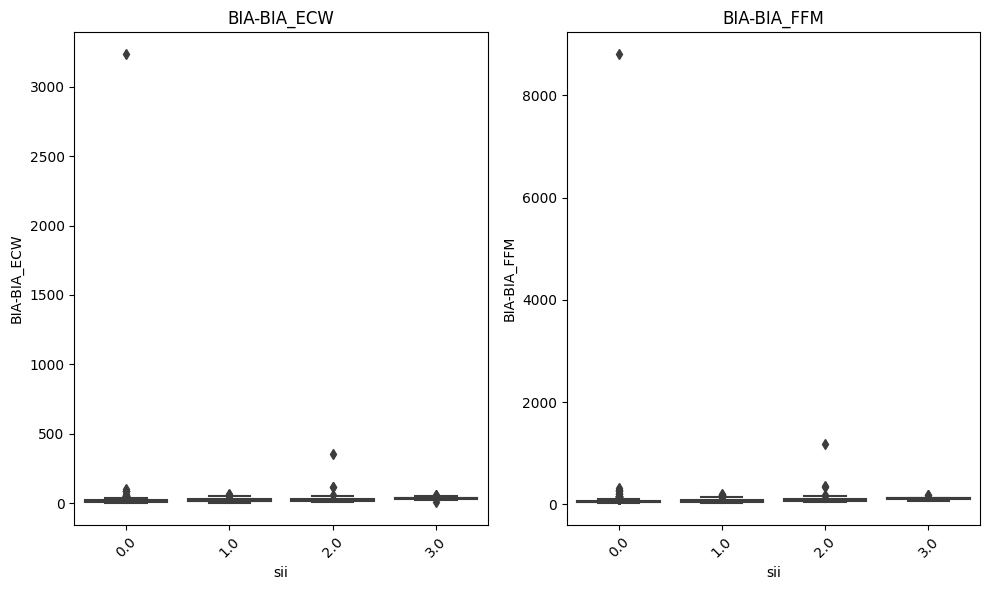

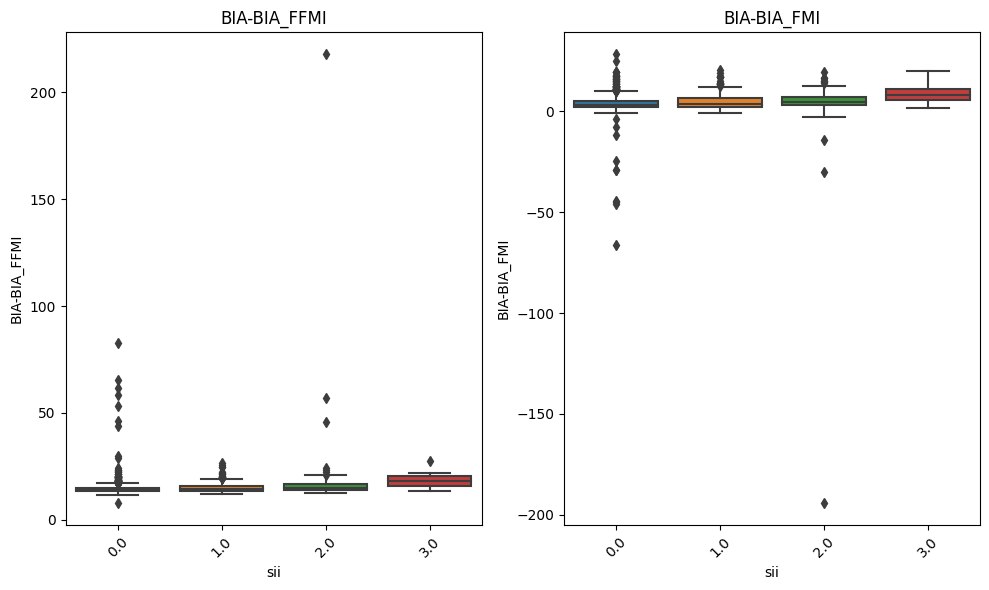

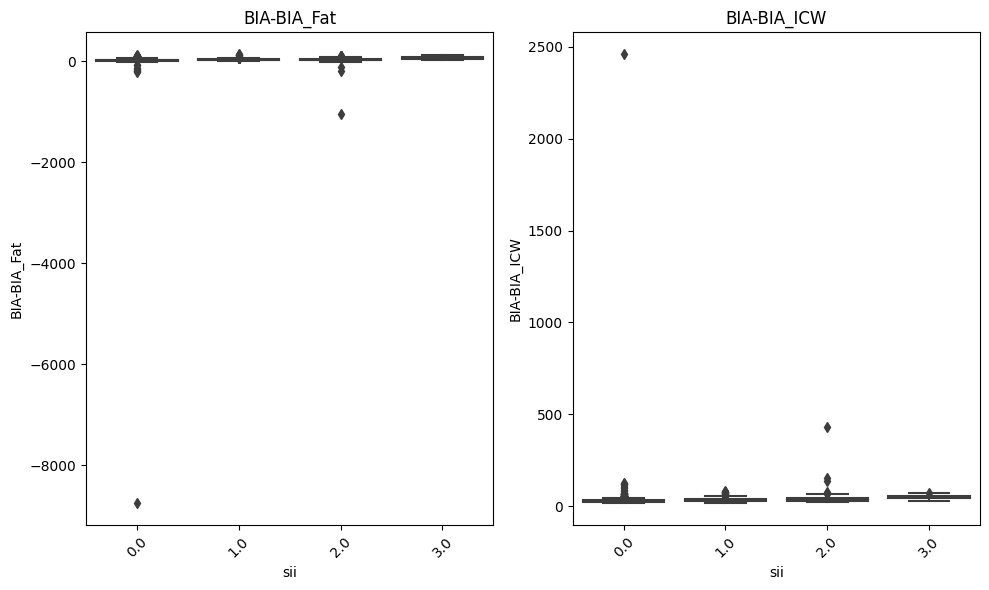

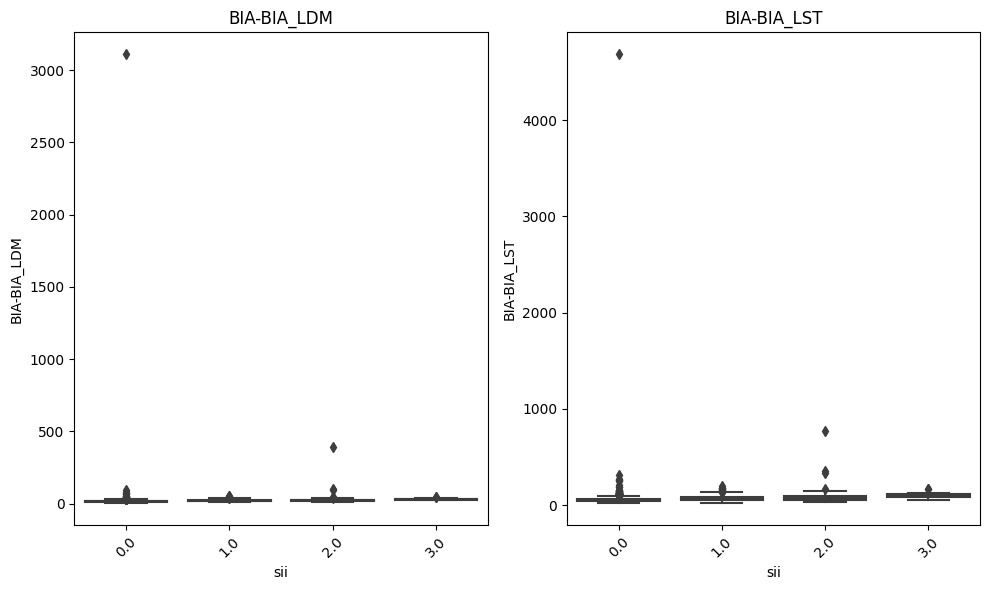

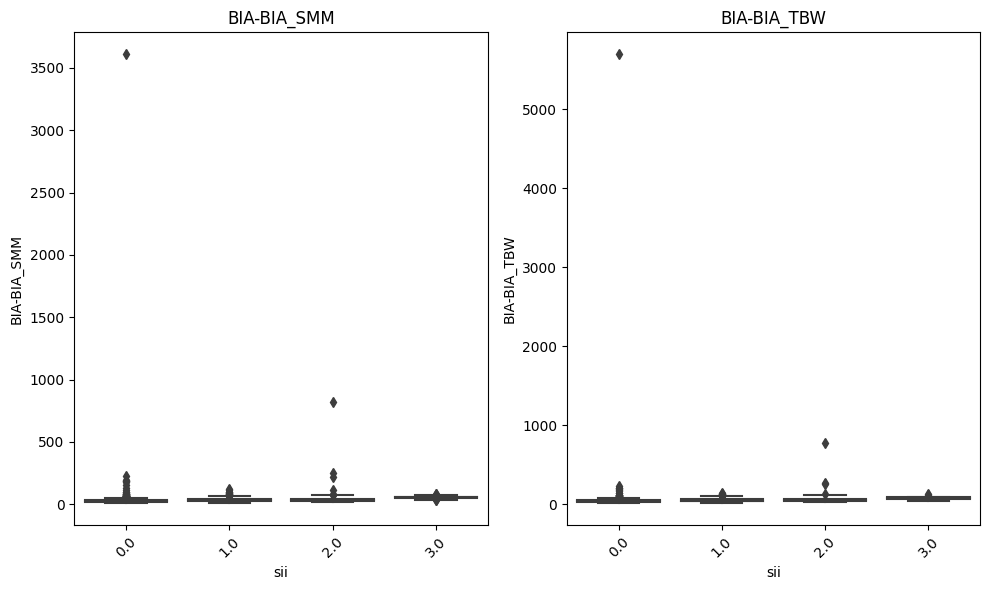

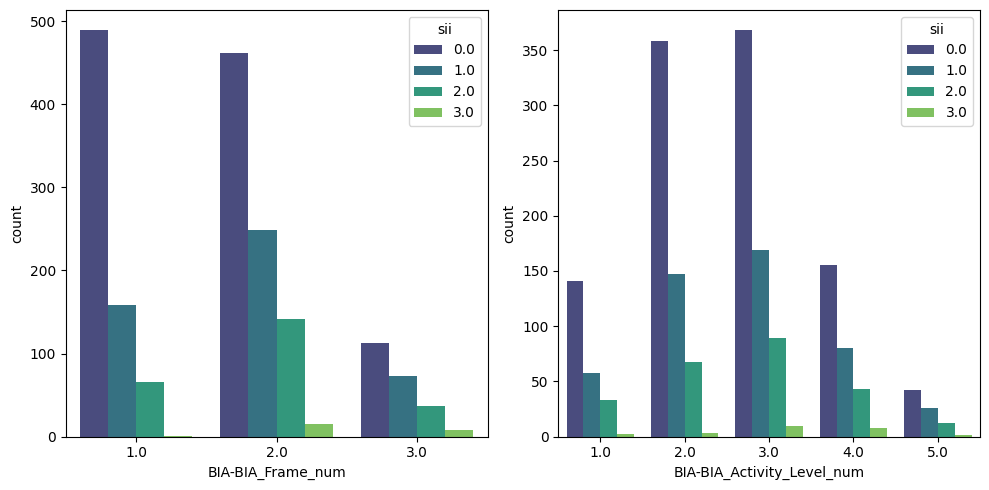

In [242]:
BIA =  ['BIA-BIA_BMC', 'BIA-BIA_BMI', 
        'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 
        'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 
        'BIA-BIA_ICW', 'BIA-BIA_LDM', 
        'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW']
BIA_cat = [ 'BIA-BIA_Frame_num', 'BIA-BIA_Activity_Level_num']
plot_per_row = 2
NUM_GROUP = [BIA[i:i + plot_per_row] for i in range(0, len(BIA), plot_per_row)]


for group in NUM_GROUP:
    plt.figure(figsize=(10, 6))
    for i, col in enumerate(group):
        plt.subplot(1, len(group), i + 1)
        sns.boxplot(x='sii', y=col, data=train_data)
        plt.title(col)
        plt.xticks(rotation=45)   
    plt.tight_layout()
    plt.show()
plot_per_row = 2
CATEGORY_NUM_GROUP = [BIA_cat[i:i+plot_per_row] for i in range(0, len(BIA_cat), plot_per_row)]

for group in CATEGORY_NUM_GROUP:
    plt.figure(figsize=(10, 5))
    for i, col in enumerate(group):
        category_num_data = train_data.groupby([col,'sii']).size().reset_index(name='count')
        plt.subplot(1, len(group), i + 1)
        sns.barplot(data=category_num_data, x=col, y='count', hue='sii', palette='viridis')
    plt.tight_layout()
    plt.show()


Distribution of Physical Activity Questionnaire by sii

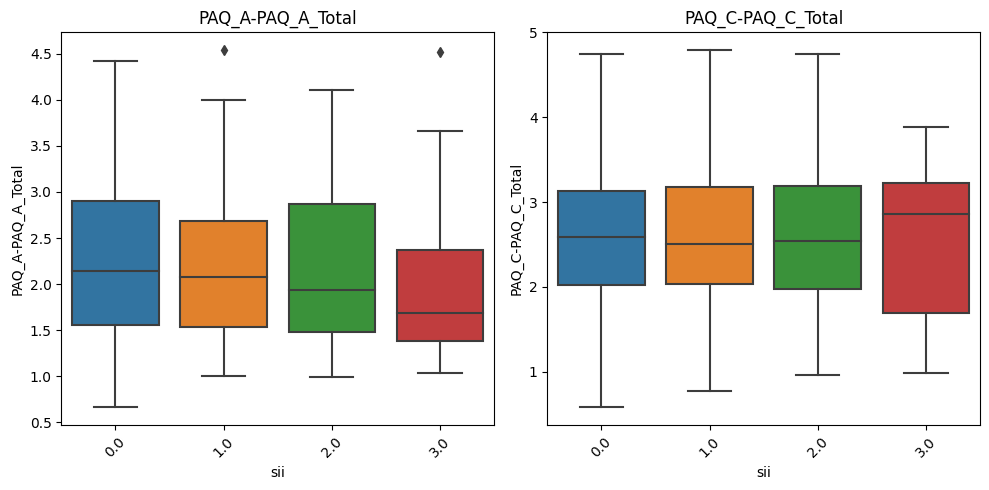

In [243]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='sii', y='PAQ_A-PAQ_A_Total', data=train_data)
plt.title('PAQ_A-PAQ_A_Total')
plt.xticks(rotation=45)
    


plt.subplot(1, 2, 2)
sns.boxplot(x='sii', y='PAQ_C-PAQ_C_Total', data=train_data)
plt.title('PAQ_C-PAQ_C_Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Distribution of Sleep Disturbance Scale by sii

Image saved at /kaggle/working/SDS_boxplot.png


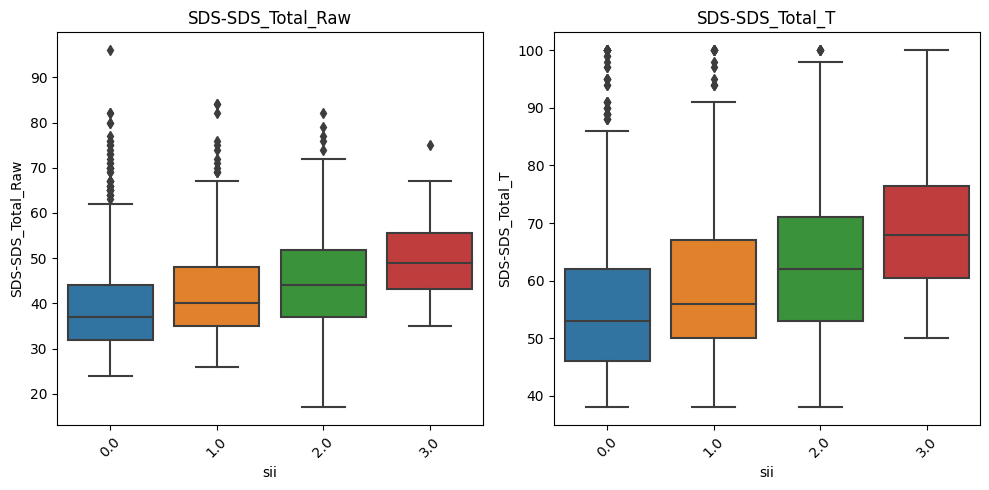

In [244]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='sii', y='SDS-SDS_Total_Raw', data=train_data)
plt.title('SDS-SDS_Total_Raw')
plt.xticks(rotation=45)
    


plt.subplot(1, 2, 2)
sns.boxplot(x='sii', y='SDS-SDS_Total_T', data=train_data)
plt.title('SDS-SDS_Total_T')
plt.xticks(rotation=45)
save_path='/kaggle/working/SDS_boxplot.png'
plt.savefig(save_path, format='png')
print(f"Image saved at {save_path}")
plt.tight_layout()
plt.show()

Distribution of Sleep Disturbance Scale by Age group

<Axes: xlabel='Basic_Demos-Age', ylabel='SDS-SDS_Total_Raw'>

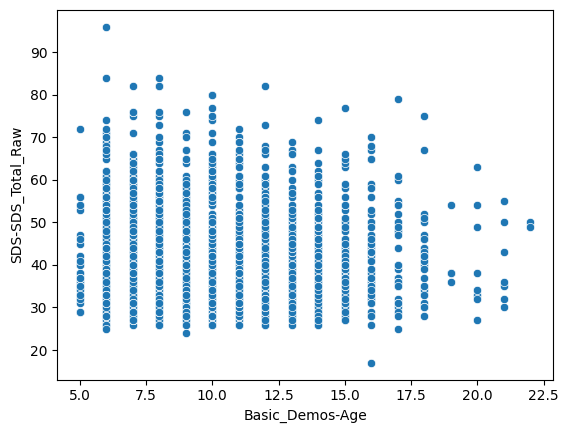

In [245]:
sns.scatterplot(x='Basic_Demos-Age', y='SDS-SDS_Total_Raw', data=train_data)


Distribution of Internet Usage Time by Age group


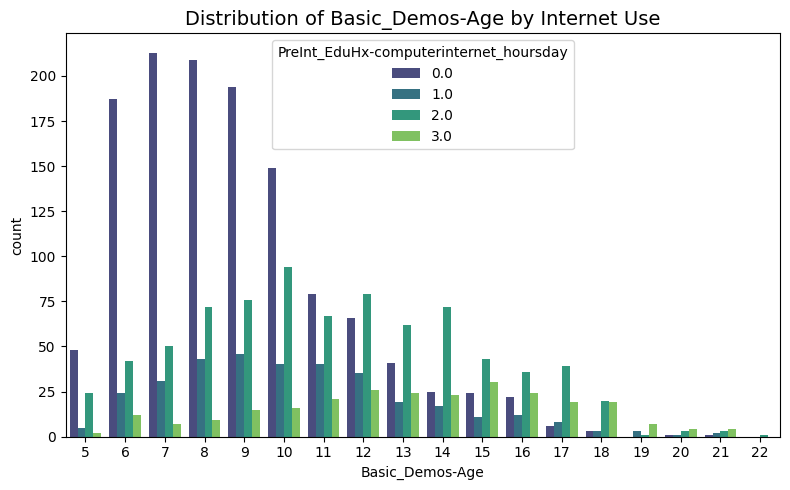

In [246]:
plt.figure(figsize=(8, 5))

age_data = train_data.groupby(['Basic_Demos-Age', 'PreInt_EduHx-computerinternet_hoursday']).size().reset_index(name='count')


sns.barplot(data=age_data, x='Basic_Demos-Age', y='count', hue='PreInt_EduHx-computerinternet_hoursday', palette='viridis')
plt.title('Distribution of Basic_Demos-Age by Internet Use', fontsize=14)


plt.tight_layout()
plt.show()


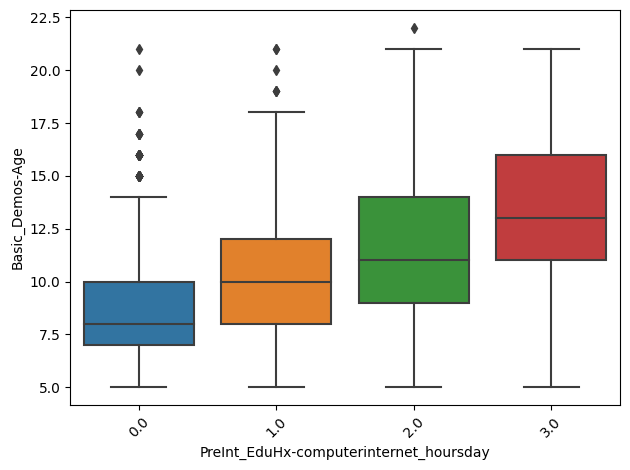

<Figure size 640x480 with 0 Axes>

In [247]:
sns.boxplot(x='PreInt_EduHx-computerinternet_hoursday', y='Basic_Demos-Age', data=train_data)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

Distribution of Internet Usage Time by sii

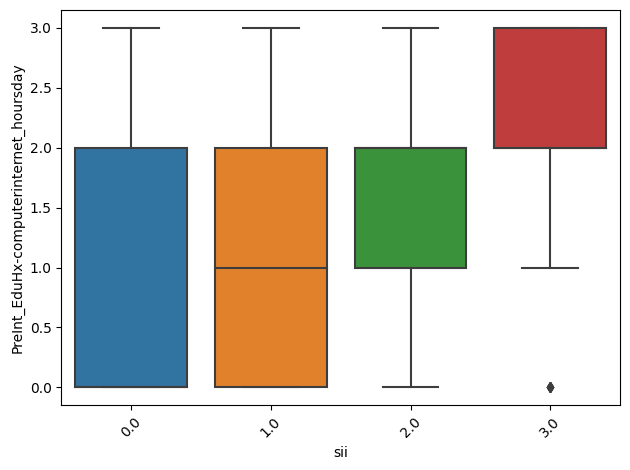

<Figure size 640x480 with 0 Axes>

In [248]:
sns.boxplot(x='sii', y='PreInt_EduHx-computerinternet_hoursday', data=train_data)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()